In [1]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, roc_curve, auc
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import ModelEvaluation as me

In [2]:
DFPants = pd.read_pickle('../data/DFPants.pkl')

In [3]:
DFPants['BOUGHT_2018'] = [1 if x > 0 else 0 for x in DFPants['N_PANTS2018']]

In [4]:
DFPants.fillna(DFPants.mean(),inplace=True)

In [5]:
print DFPants.shape

(65098, 43)


In [6]:
cols = DFPants.columns
cols_X = cols[2:-2]
cols_y = 'BOUGHT_2018'

In [11]:
cols_X

Index([u'TOTAL_BOUGHT_2017', u'SHIPPED_SOLD_AMT_2017', u'AVG_SHIPPED_SOLD_AMT_2017', u'STD_SHIPPED_SOLD_AMT_2017', u'VAR_SHIPPED_SOLD_AMT_2017', u'DISCOUNT_2017', u'AVG_DISCOUNT_2017', u'STD_DISCOUNT_2017', u'VAR_DISCOUNT_2017', u'ENDUSE_HAS_CORE_2017', u'ENDUSE_HAS_WEAREVER_2017', u'ENDUSE_HAS_PUREJILL_2017', u'PAYTYPE_HAS_JJC_2017', u'PAYTYPE_HAS_VISA_2017', u'PAYTYPE_HAS_MC_2017', u'PAYTYPE_HAS_AMEX_2017', u'PAYTYPE_HAS_DISC_2017', u'PAYTYPE_HAS_DEBIT_2017', u'PAYTYPE_HAS_CASH_2017', u'PAYTYPE_HAS_CK_2017', u'PAYTYPE_HAS_OTHER_2017', u'FABRICCATEGORY_HAS_COTTON/COTTONBL_2017', u'FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017', u'FABRICCATEGORY_HAS_LINEN/LINENBL_2017', u'ENDUSE_%_CORE_2017', u'ENDUSE_%_WEAREVER_2017', u'ENDUSE_%_PUREJILL_2017', u'PAYTYPE_%_JJC_2017', u'PAYTYPE_%_VISA_2017', u'PAYTYPE_%_MC_2017', u'PAYTYPE_%_AMEX_2017', u'PAYTYPE_%_DISC_2017', u'PAYTYPE_%_DEBIT_2017', u'PAYTYPE_%_CASH_2017', u'PAYTYPE_%_CK_2017', u'PAYTYPE_%_OTHER_2017',
       u'FABRICCATEGORY_%_COTTON/C

In [9]:
DFPants.head()

,ILINK,DEPARTMENT_NAME,TOTAL_BOUGHT_2017,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,ENDUSE_HAS_CORE_2017,ENDUSE_HAS_WEAREVER_2017,ENDUSE_HAS_PUREJILL_2017,PAYTYPE_HAS_JJC_2017,PAYTYPE_HAS_VISA_2017,PAYTYPE_HAS_MC_2017,PAYTYPE_HAS_AMEX_2017,PAYTYPE_HAS_DISC_2017,PAYTYPE_HAS_DEBIT_2017,PAYTYPE_HAS_CASH_2017,PAYTYPE_HAS_CK_2017,PAYTYPE_HAS_OTHER_2017,FABRICCATEGORY_HAS_COTTON/COTTONBL_2017,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_HAS_LINEN/LINENBL_2017,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_PANTS2018,BOUGHT_2018
0,0000000004,Pants,9.0,378.84,42.093333,15.642059,244.674025,208.10,23.122222,3.723835,13.866944,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556,0.444,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.444,0.0,0.0,0
3,0000000023,Pants,1.0,27.99,27.990000,12.858436,245.052252,12.00,12.000000,7.279993,77.617958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0,0
7,0000000049,Pants,3.0,123.32,41.106667,35.605170,1267.728133,54.68,18.226667,15.797726,249.568133,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0
9,0000000088,Pants,2.0,124.60,62.300000,0.000000,0.000000,53.40,26.700000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000,0.000,0.0,0.0,0
11,0000000118,Pants,8.0,393.64,49.205000,10.663724,113.715000,198.36,24.795000,5.371951,28.857857,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.875,0.000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.000,0.0,1.0,1


# Pants Model

Random Forest Classifier Fit BOUGHT_2018
Best estimator score: 0.6885076444797894
Best estimator params: {'rfc__max_depth': 7}

Validation Score Accuracy: 68.85% +/- 0.39%
Train Score Accuracy: 71.01% +/- 0.12%


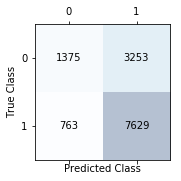

Accuracy: 0.69
Missclassification Rate: 0.31
(1) Positive Rate(Recall): 0.91
(0) Positive Rate(Sensitivity): 0.30
Precision(proportion of predicted (1)): 0.70
Specificity(proportion of predicted (0): 0.64


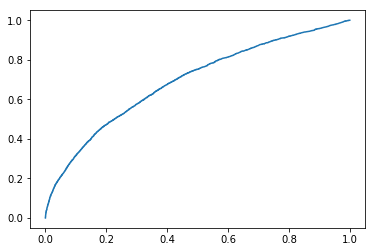

AUC(Area Under Curve) score: 0.690810

CPU times: user 34.4 s, sys: 4.56 s, total: 38.9 s
Wall time: 18min 30s


In [8]:
%%time

X = DFPants[cols_X]
y = DFPants[cols_y]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

#Using Training data, to make validation set. 60-20-20 (training, valid, test)
cv = ShuffleSplit(n_splits=50,test_size=.25,random_state=42)

print 'Random Forest Classifier Fit %s' % cols_y
pipe = Pipeline([('rfc',RandomForestClassifier(n_estimators=100,
                                               max_features='auto'))])

params = [{'rfc__max_depth': [1,2,3,4,5,6,7,8,9,None]}]
grid = GridSearchCV(estimator=pipe,
                    param_grid=params,
                    scoring='roc_auc',
                    cv = cv,
                    n_jobs=-1)

grid.fit(X_train,y_train)
print 'Best estimator score:',grid.best_score_
print 'Best estimator params:',grid.best_params_
print ''
#dill.settings['recurse']=True
#with open('./Models/T1_MayAug_LogReg_%s.pkl' % cols_y,'wb') as outfile:
#    dill.dump(grid,outfile)

me.ModelEvalClassifier(grid,X_train,X_test,y_train,y_test)
print ''